In [23]:
import  tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append('../')
tf.compat.v1.disable_eager_execution()

from seguq.bayesian_mcd_seg import SegBayesianMCD
from seguq.aleatoric_uncertainty import AleatoricUncertainty
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from seguq.utils.vizutils import visualize_labels_overlay_labelmap, visualize_labelmaps


In [39]:

T=10 #number of montecarlo iterations

model_dir = '../../../git_public/semantic-image-segmentation/temp/unet_mnist'
model_prefix= 'unet_mnist'
model = None # load from json file


In [40]:
#Load models
epistemic_model  = SegBayesianMCD(model_dir=model_dir, model_prefix=model_prefix, model=unet, T=T)
aleoteric_model = AleatoricUncertainty(model_dir= model_dir, model_prefix=model_prefix, model=model)

models= [epistemic_model,  aleoteric_model]
labels=[ 'Epistemic Uncertainty', 'Aleoretic Uncertainty']



unet_mnist
../../../git_public/semantic-image-segmentation/temp/unet_mnist
Loading model by enabling dropout.
unet_mnist
../../../git_public/semantic-image-segmentation/temp/unet_mnist


In [41]:
#Load test image
in_image ='test_mnist_noisy.jpeg'

im_in=cv2.imread(in_image, cv2.IMREAD_GRAYSCALE)
im_in=cv2.resize(im_in, (128,128))
im_in= np.expand_dims(im_in, 0)

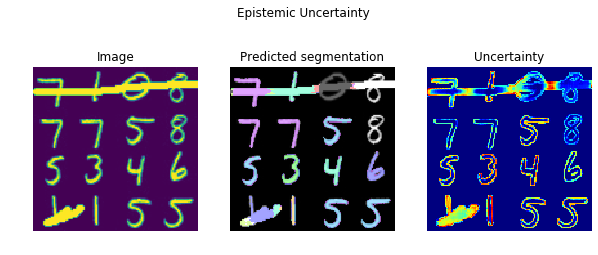

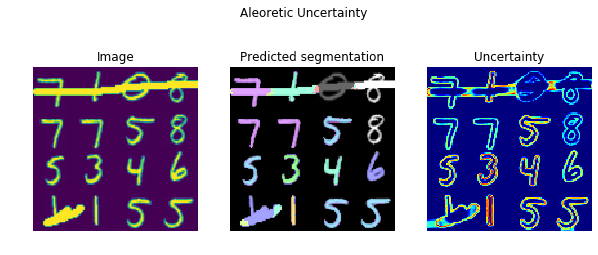

In [42]:
# segmentation and visualization of uncertainty 
im = np.expand_dims(im_in,-1)
for model, label in zip(models, labels):
    out, var=model.segment(im_in, batch_size=1)
    viz=visualize_labels_overlay_labelmap(out,im,9)
    fig=plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(im[0,:,:,0])
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,3,2)
    plt.imshow(viz.astype(np.uint8))
    plt.axis('off')
    plt.title('Predicted segmentation')
    plt.subplot(1,3,3)
    plt.imshow(var[0], cmap='jet')
    plt.axis('off')
    plt.title('Uncertainty')
    fig.suptitle(label, y=0.7)
    plt.show()

    
    